# <font color = "purple">Evaluating Regression Model Exercises

- Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.



In [120]:
#warnings
import warnings
warnings.filterwarnings("ignore")

#Python imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pydataset import data

#Linear model
from statsmodels.formula.api import ols

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt





### 1. Load the tips dataset from either pydataset or seaborn.



In [121]:
tips = data('tips')


In [122]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [123]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

**Here is some sample code to get you started:**

```python
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)
```

The code above fits a linear regression model on the df dataset, using column `y` as the target and column `x` as the predictor. Modify the code as necessary to work with the `tips` dataset.



In [124]:
model = ols("tip ~ total_bill", data=tips).fit()
predictions = model.predict(tips.total_bill)


In [125]:
tips['yhat'] = predictions
tips['baseline'] = tips.tip.mean()

In [126]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

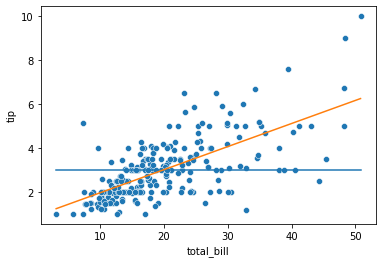

In [127]:
#Plot
sns.scatterplot(x= 'total_bill', y = 'tip', data = tips)
sns.lineplot(x ='total_bill', y ='baseline', data = tips)
sns.lineplot(x= 'total_bill', y = 'yhat', data= tips)

### 3. Plot the residuals for the linear regression model that you made.



In [128]:
#set residual
tips['residual'] = tips.tip - tips.yhat
tips['baseline_residual'] = tips.tip - tips.baseline

In [129]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


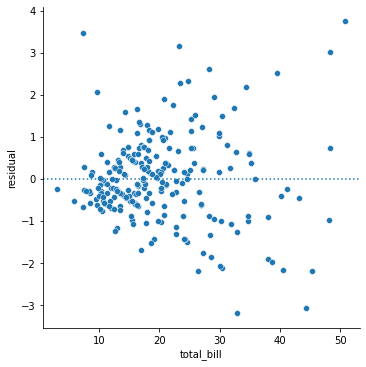

In [130]:

sns.relplot(x = "total_bill", y = 'residual', data = tips)
plt.axhline(0, ls = ":")

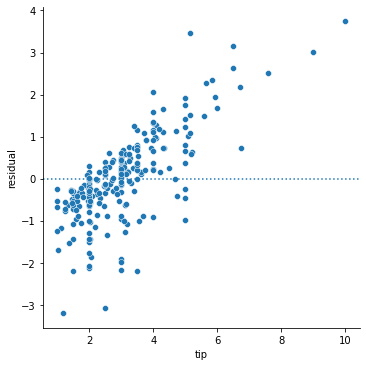

In [131]:
#Plot Residual
sns.relplot(x = 'tip', y = 'residual', data = tips)
plt.axhline(0, ls = ':')

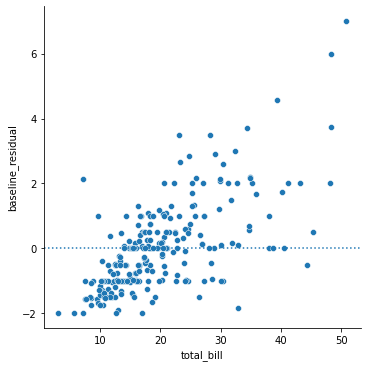

In [132]:
sns.relplot(x = 'total_bill', y = 'baseline_residual', data = tips)
plt.axhline(0, ls = ':')

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



In [133]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


#### <font color="darkgreen">Sum of Squared Errors(SSE)</font>

In [134]:
SSE = (tips.residual**2).sum()
print("SSE = ", SSE)

SSE =  252.788743850776


In [135]:
#SSE Baseline
SSE_baseline =(tips.baseline_residual**2).sum()
print("SSE_baseline", SSE_baseline)

SSE_baseline 465.2124770491804


#### <font color="darkgreen">Mean Squared Error(MSE)</font>

In [136]:
MSE = SSE/len(tips)

print("MSE = ", MSE)



MSE =  1.036019442011377


In [137]:
MSE_baseline = SSE_baseline/len(tips)
MSE_baseline

1.906608512496641

In [138]:
print("MSE = ", MSE)
print("MSE  baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE  baseline =  1.906608512496641


In [139]:
# Use sklearn to calculate MSE

mean_squared_error(tips.tip, tips.yhat)

1.036019442011377

### <font color="darkgreen">Root Mean Suared Error(RMSE)</font>

In [140]:
RMSE = mean_squared_error(tips.tip, tips.yhat, squared = False)
RMSE

1.0178504025697377

In [141]:
# RMSE for the baseline model
RMSE_baseline = mean_squared_error(tips.tip, tips.baseline, squared = False)
RMSE_baseline

1.3807999538298954

* `RMSE model performs better than the baseline`

### <font color="darkgreen"> Total Sum of Squares(TSS)</font>

In [142]:
ESS = sum((tips.yhat - tips.baseline)** 2)
ESS

212.42373319840414

In [143]:
TSS = ESS + SSE
TSS

465.21247704918017

### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).



In [144]:
tips_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
tips_eval['model_error'] = np.array([SSE,  MSE, RMSE])


tips_eval

,metric,model_error
0,SSE,252.788744
1,MSE,1.036019
2,RMSE,1.017850


In [145]:
tips_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

tips_eval

,metric,model_error,baseline_error
0,SSE,252.788744,465.212477
1,MSE,1.036019,1.906609
2,RMSE,1.017850,1.380800


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [146]:
tips_eval['better_than_baseline'] = tips_eval.baseline_error > tips_eval.model_error


In [147]:
tips_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


In [148]:
print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

if SSE < SSE_baseline:
    print("My model beat my baseline.")
else: 
    print("My baseline was better than my model")

SSE =  252.788743850776
SSE - baseline =  465.2124770491804
My model beat my baseline.


7. What is the amount of variance explained in your model?

In [149]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        08:28:21   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [150]:
print("R2: ", model.rsquared)

R2:  0.45661658635167646


In [151]:
print("R2: ", model.rsquared_adj)

R2:  0.4543712003448651


In [152]:
print('Parameters : ', model.params)

Parameters :  Intercept     0.920270
total_bill    0.105025
dtype: float64


### 8. Is your model significantly better than the baseline model?

Yes

### 9. Create a file named `evaluate.py` that contains the following functions.

   * **plot_residuals(y, yhat)Z**: creates a residual plot
   * **regression_errors(y, yhat)**: returns the following values:
        * sum of squared errors (`SSE`)
        * explained sum of squares (`ESS`)
        * total sum of squares (`TSS`)
        * mean squared error (`MSE`)
        * root mean squared error (`RMSE`)
   * **baseline_mean_errors(y)**: computes the SSE, MSE, and RMSE for the baseline model
   * **better_than_baseline(y, yhat)**: returns true if your model performs better than the baseline, otherwise false
   * **model_significance(ols_model)**: that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)


In [153]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls =":")
    plt.scatter(actual, residuals)
    plt.ylabel('residuals ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

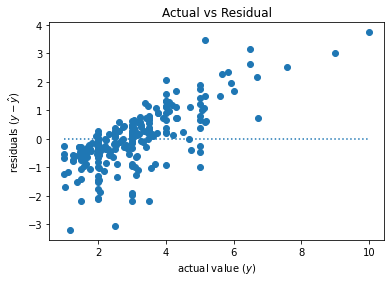

In [154]:
plot_residuals(tips.tip, tips.yhat)

In [155]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

In [156]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

def model_significance(ols_model):
    return {
        'r^2 -- variance explained': ols_model.rsquared,
        'p-value -- P(data|model == baseline)': ols_model.f_pvalue,
    }

### 10. Load the `mpg` dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your `evaluate.py` to help accomplish this

In [157]:
import evaluate

In [158]:
mpg = data('mpg')

In [159]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


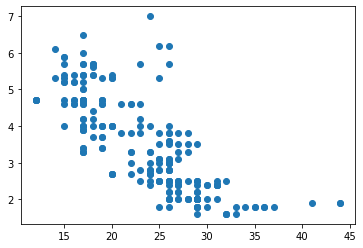

In [160]:
plt.scatter(mpg.hwy, mpg.displ)

In [161]:
model1 = ols('hwy ~ displ', data=mpg).fit()  
predictions = model1.predict(mpg.displ)  

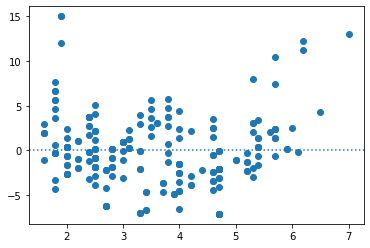

In [162]:
plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')

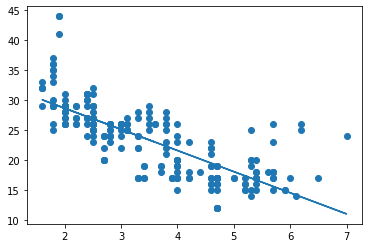

In [163]:
plt.scatter(mpg.displ, mpg.hwy)
plt.plot(mpg.displ, predictions)

In [165]:
evaluate.regression_errors(mpg.hwy, predictions)

NameError: name 'pd' is not defined